Shape of The Before outliers:  (10000,)
Shape of The After outliers:  (9936,)


d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


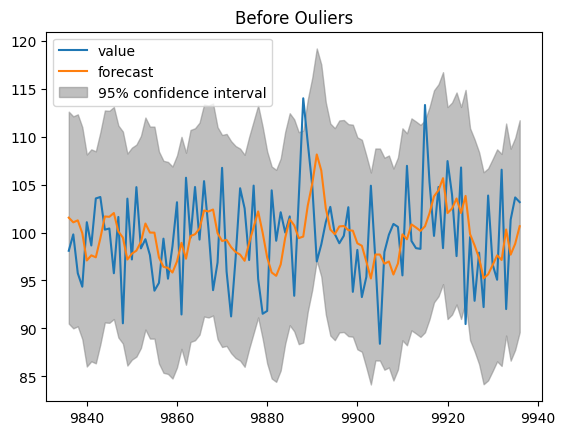

d:\ancode\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


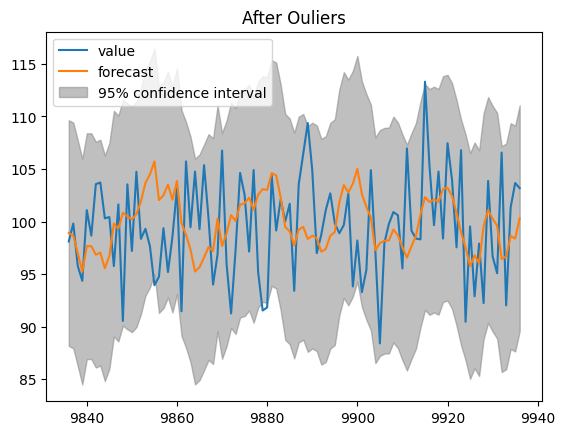

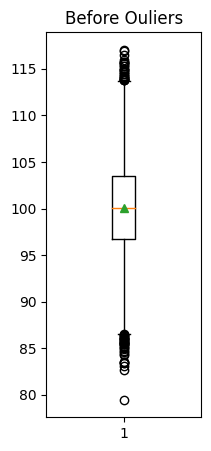

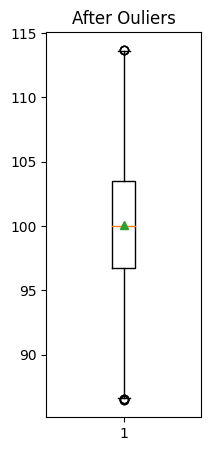

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import random
import seaborn as sns

#-----------------------------------------------------考試填空部分------------------------------------------------------

L = [random.normalvariate(100,5) for i in range(10000)]
df = pd.DataFrame(pd.Series(L) , columns =["value"] )
print("Shape of The Before outliers: ",df["value"].shape)
# 找IQR
# 計算第一四分位數(Q1)和第三四分位數(Q3)
Q1 = df["value"].quantile(0.25)
Q3 = df["value"].quantile(0.75)
IQR = Q3-Q1
# 找出符合離群值條件的行
outliers = df[(df["value"] < Q1 - 1.5 * IQR) | (df["value"] > Q3 + 1.5 * IQR)]

# 刪除離群值
transform_dataDF = pd.DataFrame(df.drop(outliers.index))      

print("Shape of The After outliers: ",transform_dataDF["value"].shape)

#-----------------------------------------------------考試填空部分------------------------------------------------------

# 以下部分已完成無需更動
# 3,2,1 ARIMA Model
model1 = sm.tsa.ARIMA(df.value, order=(3,2,1))
model_fit1 = model1.fit()

model2 = sm.tsa.ARIMA(transform_dataDF.value, order=(3,2,1))
model_fit2 = model2.fit()

fig, ax = plt.subplots()
ax = df.loc[(transform_dataDF.shape[0]-100):transform_dataDF.shape[0]].plot(ax=ax)
plot_predict(model_fit1, transform_dataDF.shape[0]-100, transform_dataDF.shape[0], ax=ax)
plt.title('Before Ouliers')
plt.show()

fig2, ax2 = plt.subplots()
ax2 = transform_dataDF.loc[(transform_dataDF.shape[0]-100):transform_dataDF.shape[0]].plot(ax=ax2)
plot_predict(model_fit2, transform_dataDF.shape[0]-100, transform_dataDF.shape[0], ax=ax2)
plt.title('After Ouliers')
plt.show()

plt.figure(figsize=(2,5))
plt.boxplot(df['value'],showmeans=True)
plt.title('Before Ouliers')
plt.show()

plt.figure(figsize=(2,5))
plt.boxplot(transform_dataDF['value'],showmeans=True)
plt.title('After Ouliers')
plt.show()

In [4]:
import numpy as np
import random
import pandas as pd
L = [random.normalvariate(100,10) for i in range(10000)]
df = pd.DataFrame(pd.Series(L) , columns =["value"] )
print("Shape of The Before outliers: ",df.values.shape)
# 找IQR
# 計算第一四分位數(Q1)和第三四分位數(Q3)
Q1 = df["value"].quantile(0.25)
Q3 = df["value"].quantile(0.75)
IQR = Q3-Q1
# 找出符合離群值條件的行
outliers = df[(df["value"] < Q1 - 1.5 * IQR) | (df["value"] > Q3 + 1.5 * IQR)]

# 刪除離群值
df = df.drop(outliers.index)
print("Shape of The After outliers: ",df.values.shape)


Shape of The Before outliers:  (10000, 1)
Shape of The After outliers:  (9941, 1)
